<a href="https://colab.research.google.com/github/mandakathingal/Landslide-Detection-using-cnn-network/blob/main/AJ_landslide_unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
import matplotlib.pyplot as plt

In [ ]:

X_train = np.load('/content/drive/MyDrive/Data/datasets/landslide/trainX (2).npy')
Y_train = np.load('/content/drive/MyDrive/Data/datasets/landslide/trainY.npy')
X_val = np.load('/content/drive/MyDrive/Data/datasets/landslide/valX.npy')
Y_val = np.load('/content/drive/MyDrive/Data/datasets/landslide/valY (1).npy')
X_test = np.load('/content/drive/MyDrive/Data/datasets/landslide/testX (2).npy')
Y_test = np.load('/content/drive/MyDrive/Data/datasets/landslide/testY (1).npy')

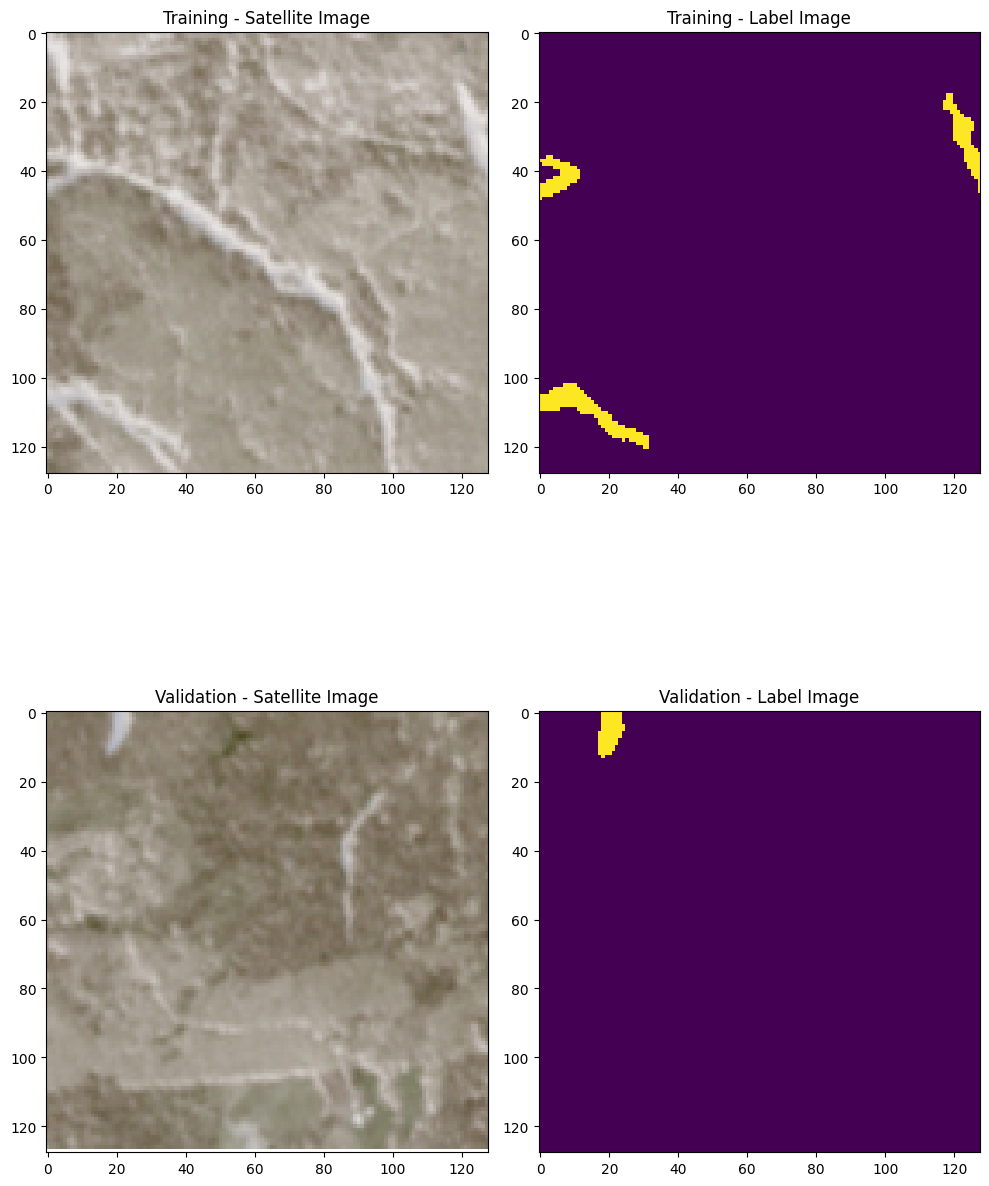

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(2, 2, 1)
plt.imshow(X_train[0])
plt.title("Training - Satellite Image")
plt.subplot(2, 2, 2)
plt.imshow(Y_train[0])
plt.title("Training - Label Image")
plt.subplot(2, 2, 3)
plt.imshow(X_val[0])
plt.title("Validation - Satellite Image")
plt.subplot(2, 2, 4)
plt.imshow(Y_val[0])
plt.title("Validation - Label Image")
plt.tight_layout()
plt.show()


In [ ]:


def unet(input_size=(128, 128, 4)):
    inputs = Input(input_size)

    conv1 = Conv2D(128, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(128, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)
    conv9 = Conv2D(2, 3, activation='relu', padding='same')(conv9)

    outputs = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
model = unet()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 4  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 128, 128, 12  4736        ['input_2[0][0]']                
                                8)                                                                
                                                                                                  
 conv2d_25 (Conv2D)             (None, 128, 128, 12  147584      ['conv2d_24[0][0]']              
                                8)                                                          

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=16, epochs=10)

score = model.evaluate(X_test, Y_test, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/10
70/70 [==============================] - 42s 417ms/step - loss: 0.7104 - accuracy: 0.8991 - val_loss: 0.1993 - val_accuracy: 0.8983
Epoch 2/10
70/70 [==============================] - 25s 363ms/step - loss: 0.1866 - accuracy: 0.8991 - val_loss: 0.1890 - val_accuracy: 0.8983
Epoch 3/10
70/70 [==============================] - 25s 362ms/step - loss: 0.1784 - accuracy: 0.8991 - val_loss: 0.1880 - val_accuracy: 0.8983
Epoch 4/10
70/70 [==============================] - 24s 350ms/step - loss: 0.1728 - accuracy: 0.9218 - val_loss: 0.1806 - val_accuracy: 0.9150
Epoch 5/10
70/70 [==============================] - 25s 364ms/step - loss: 0.1742 - accuracy: 0.9248 - val_loss: 0.1814 - val_accuracy: 0.9173
Epoch 6/10
70/70 [==============================] - 25s 362ms/step - loss: 0.1694 - accuracy: 0.9257 - val_loss: 0.1876 - val_accuracy: 0.9165
Epoch 7/10
70/70 [==============================] - 25s 362ms/step - loss: 0.1662 - accuracy: 0.9273 - val_loss: 0.1780 - val_accuracy: 0.9194

In [ ]:
predictions = model.predict(X_test)


12/12 [==============================] - 2s 163ms/step


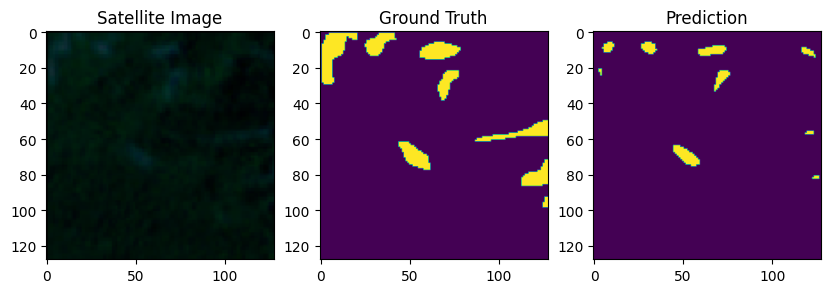

In [ ]:
sample_index = 23
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X_test[sample_index][:, :, :3])
plt.title("Satellite Image")
plt.subplot(1, 3, 2)
plt.imshow(Y_test[sample_index].squeeze())
plt.title("Ground Truth")
plt.subplot(1, 3, 3)
prediction = (predictions > 0.5).astype(np.uint8)
plt.imshow(prediction[sample_index].squeeze())
plt.title("Prediction")
plt.show()

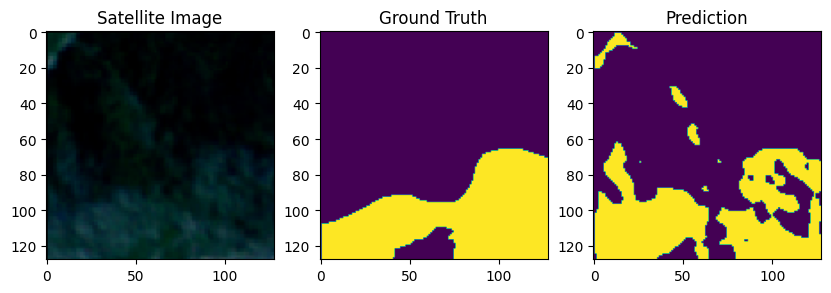

In [ ]:
sample_index = 10
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X_test[sample_index][:, :, :3])
plt.title("Satellite Image")
plt.subplot(1, 3, 2)
plt.imshow(Y_test[sample_index].squeeze())
plt.title("Ground Truth")
plt.subplot(1, 3, 3)
prediction = (predictions > 0.5).astype(np.uint8)
plt.imshow(prediction[sample_index].squeeze())
plt.title("Prediction")
plt.show()

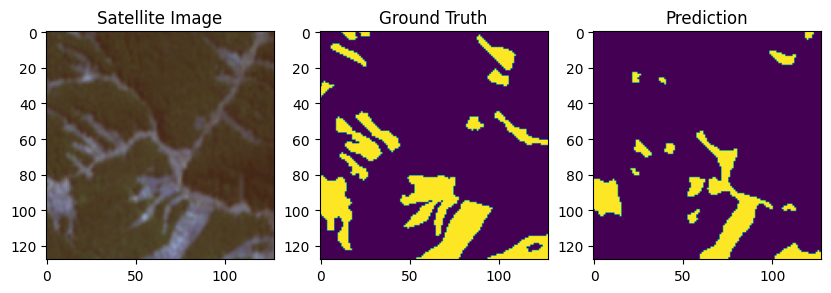

In [ ]:
sample_index = 3
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X_test[sample_index][:, :, :3])
plt.title("Satellite Image")
plt.subplot(1, 3, 2)
plt.imshow(Y_test[sample_index].squeeze())
plt.title("Ground Truth")
plt.subplot(1, 3, 3)
prediction = (predictions > 0.5).astype(np.uint8)
plt.imshow(prediction[sample_index].squeeze())
plt.title("Prediction")
plt.show()

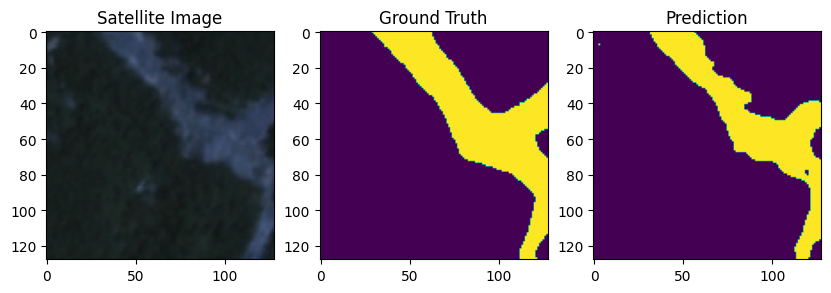

In [ ]:
sample_index = 200
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X_test[sample_index][:, :, :3])
plt.title("Satellite Image")
plt.subplot(1, 3, 2)
plt.imshow(Y_test[sample_index].squeeze())
plt.title("Ground Truth")
plt.subplot(1, 3, 3)
prediction = (predictions > 0.5).astype(np.uint8)
plt.imshow(prediction[sample_index].squeeze())
plt.title("Prediction")
plt.show()

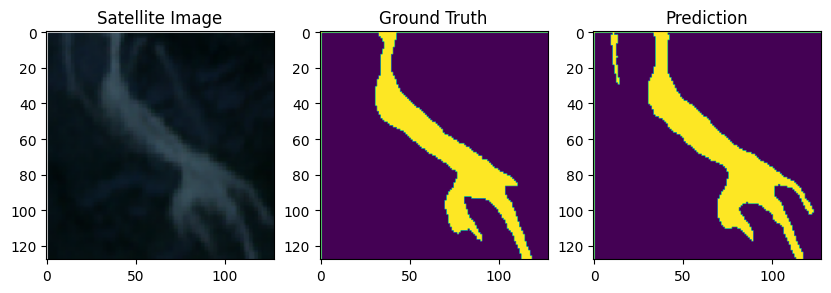

In [ ]:
sample_index = 300
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X_test[sample_index][:, :, :3])
plt.title("Satellite Image")
plt.subplot(1, 3, 2)
plt.imshow(Y_test[sample_index].squeeze())
plt.title("Ground Truth")
plt.subplot(1, 3, 3)
prediction = (predictions > 0.5).astype(np.uint8)
plt.imshow(prediction[sample_index].squeeze())
plt.title("Prediction")
plt.show()

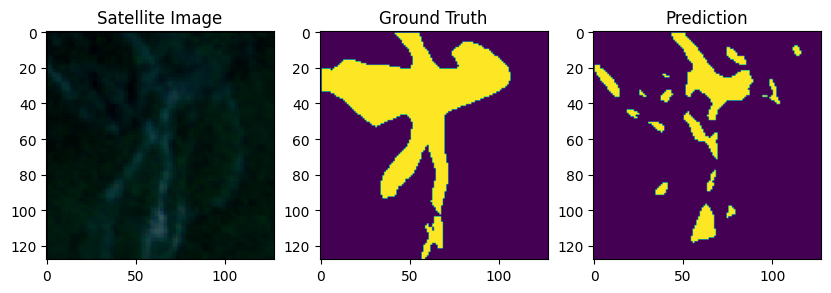

In [ ]:
sample_index = 9
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X_test[sample_index][:, :, :3])
plt.title("Satellite Image")
plt.subplot(1, 3, 2)
plt.imshow(Y_test[sample_index].squeeze())
plt.title("Ground Truth")
plt.subplot(1, 3, 3)
prediction = (predictions > 0.5).astype(np.uint8)
plt.imshow(prediction[sample_index].squeeze())
plt.title("Prediction")
plt.show()